In [1]:
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt
import urllib3
import csv
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle #洗牌

import json
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
#, plot_confusion_matrix

In [2]:
with open('train.json','r', encoding='utf-8') as f:
    train_file = json.load(f)
with open('test.json','r', encoding='utf-8') as fi:
    test_file = json.load(fi)



In [3]:
def text_data(input_data):
    #text = []
    text = [" ".join( n['ingredients']).lower() for n in input_data]
    #for n in input_data:
        #text.append(n['ingredients'])
    return text

train_text = text_data(train_file)
test_text = text_data(test_file)

In [4]:
def data_make(text, flag):
    if flag == "train":
        x_val = tf.fit_transform(text)
    else:
        x_val = tf.transform(text)
        
    
    x_val = x_val.astype('float')
    return x_val


#x_train_data = tf.fit_transform(train_text)
#x_test_data = tf.transform(test_text)
#x_train_data = x_train_data.astype('float')
#x_test_data = x_test_data.astype('float')
tf = TfidfVectorizer(binary=True )
x_data = data_make(train_text, flag="train")
x_test = data_make(test_text, flag="test")
#print(x_data)

In [5]:
cuisine_target = [ n['cuisine']  for n in train_file]
label = LabelEncoder()
label.fit(cuisine_target)
y_data = label.transform(cuisine_target)
#print(cuisine_target)

In [6]:
x_train, x_valid, y_train, y_valid = train_test_split(x_data,y_data,random_state=123, train_size=0.7,test_size = 0.3)
#print(x_train)

In [7]:
svc = SVC(C=40, gamma= 1)
SVC_model = OneVsRestClassifier(svc)
SVC_model.fit(x_train, y_train) #x_data,y_data

OneVsRestClassifier(estimator=SVC(C=40, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          n_jobs=None)

In [8]:
y_pred = SVC_model.predict(x_valid)
print("accuracy", SVC_model.score(x_valid,y_valid))

accuracy 0.8033135564759879


              precision    recall  f1-score   support

           0       0.85      0.62      0.72        94
           1       0.66      0.51      0.57       158
           2       0.78      0.73      0.75       332
           3       0.78      0.86      0.82       553
           4       0.82      0.63      0.71       202
           5       0.61      0.65      0.63       595
           6       0.80      0.72      0.76       259
           7       0.87      0.92      0.90       667
           8       0.68      0.48      0.56       162
           9       0.81      0.90      0.85      1763
          10       0.86      0.77      0.81       125
          11       0.86      0.75      0.80       348
          12       0.83      0.74      0.78       175
          13       0.89      0.94      0.92      1458
          14       0.86      0.78      0.82       189
          15       0.75      0.46      0.57       121
          16       0.76      0.82      0.79       968
          17       0.70    

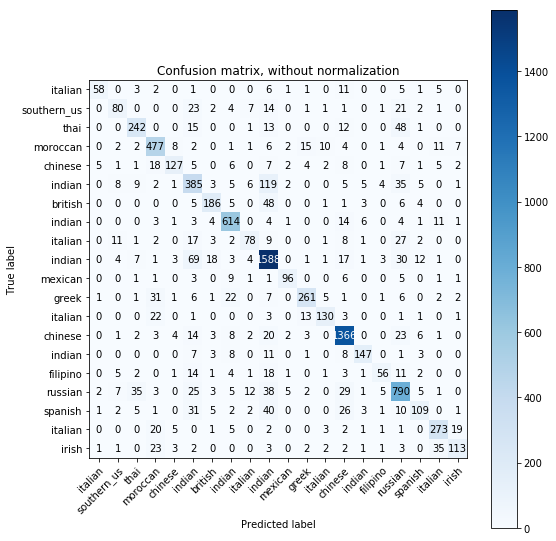

In [9]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
   
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots(figsize=(8,8))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

print(classification_report(y_valid, y_pred))
plot_confusion_matrix(y_valid, y_pred, classes=cuisine_target , cmap=plt.cm.Blues)


In [10]:
y_test = SVC_model.predict(x_test)
cuisine_test = label.inverse_transform(y_test)
#print(cuisine_test)

In [11]:
ids = [  n['id'] for n in test_file]
csv = pd.DataFrame( {'Id':ids, 'Category':cuisine_test}, columns = ['Id','Category'] )
csv.to_csv('y_test.csv',index=False)
